# Pràctica 4: SVM


## Avaluació i entregues

### Entregues
Les pràctiques es realitzarán els divendres de 15:00 a 17:00. Cada setmana presentarem nous mètodes i algorismes vistos a la classe de teoria.

L'entrega, es realitzarà el següent dijous abans de les 23:59, és a dir, tindreu les hores de classe més tota una setmana per a realitzar les tasques. Es pujará un .ipynb ja executat, on no només hi hagi codi sinó també text explicatiu de gràfiques, resultats, i analisis. Tingueu en compte que no es valora tant la quantitat, sino la qualitat del que s'hi explica. Hem d'aprendre a extreure el gra de la palla i presentar-ho de forma correcta i concisa.


### Avaluació
Aquesta práctica será molt més dirigida que l'anterior. S'evaluarán els següents conceptes sobre una mateixa base de dades, que tractarà sobre els vins:

* A. SVM (20%)
* B. ROC curve vs PR (30%)
* C. Crossvalidation (30%)
* D. Hyperparameter search (20%)


### Dataset
Per aquesta pràctica hem decidit treballar amb una base de dades de imatges. Es tracta de [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist). És similar a la base de dades de MNIST, un dataset clàssic en la visió per computador. Són imatges de 28x28 pixels i en escala de grisos. El original disposa de 60.000 imatges de entrenament i 10.000 de test. Està anotat en 10 categories diferents:

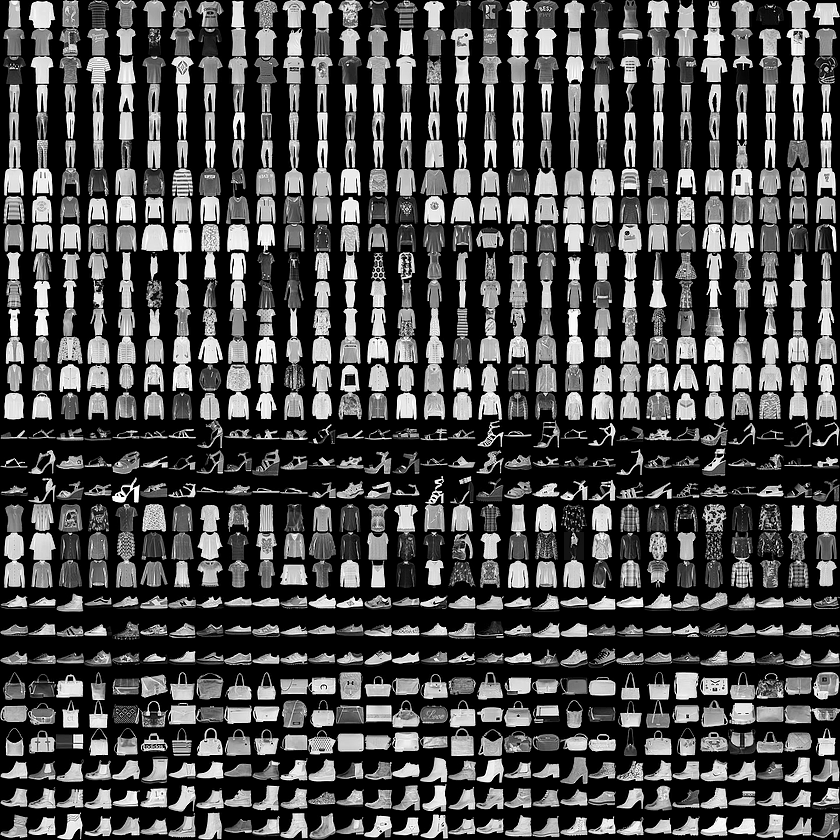

|Id|Nom|
|:-:|:--|
|0|T-shirt/top 
|1|Trouser |
|2|Pullover| 
|3|Dress|
|4|Coat|
|5|Sandal|
|6|Shirt|
|7|Sneaker|
|8|Bag |
|9|Ankle boot|


Ens hem descarregat el csv desde: https://www.kaggle.com/zalando-research/fashionmnist.

Els hem simplificat i dividit en altres csv més petits. Tenim els originals, i llavors un subsampling (100 vegades més petit). Dels petits, a més, també tenim el cas binari.

| nom | set | # exemples | # categories |
|:--|:-:|:-:|:-:|
|fashion-mnist_train_small_binary.csv   |train|     600 |  2 |
|fashion-mnist_test_small_binary.csv    |test |     100 |  2 |
|fashion-mnist_train_small.csv          |train|     600 | 10 |
|fashion-mnist_test_small.csv           |test |     100 | 10 |
|fashion-mnist_train.csv                |train|  60.000 | 10 |
|fashion-mnist_test.csv                 |test |  10.000 | 10 |

Les dues originals, les podeu *descarregar* del link de [Kaggle](https://www.kaggle.com/zalando-research/fashionmnist?select=fashion-mnist_train.csv). Son uns 150MB una vegada descomprimits.


In [1]:
# Importar llibreries i obrir el dataset

import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
# sns.set_theme()

# Visualitzarem només 3 decimals per mostra, i definim el num de files i columnes a mostrar
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 50)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('fashion-mnist_train_small_binary.csv')
Y_train = dataset["label"]
X_train = dataset.drop("label", axis="columns")


print("Dimensionalitat de la BBDD:", dataset.shape)


Dimensionalitat de la BBDD: (600, 785)


## A. SVM (20%)

L'objectiu d'aquest apartat es familiaritzar-se amb el modul de [SVM de sklearn](https://scikit-learn.org/stable/modules/svm.html).

En aquest apartat només farem servir les dades **fashion-mnist_train_small_binary.csv**	i **fashion-mnist_train_small.csv**



Bàsicament tenim a dos models: el [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) i el [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)

#### SVC

El model SVC está implementat a través de libsm. El temps d'entrenament escala almenys **quadràticament** amb el número de exemples.

A més, el multiclass s'implementa amb la estratègia One-Vs-One (OVO).

Tot i així, ens permet fer servir varis **kernels**: 
* ‘linear’
* ‘poly’ 
* ‘rbf’ (default)
* ‘sigmoid’ 
* ‘precomputed’ 

Mireu quins parametres apliquen a cada un dels kernels a la seva [documentació](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

*EL FAREM SERVIR QUAN TENIM **POCS EXEMPLES**, O MOLT DE TEMPS..*

#### LinearSVC

El model LinearSVC está implementat a través de liblinear. Hauria de permetre treballar amb més dades (escala molt millor amb el número d'exemples).

A més, el multiclass s'implementa amb la estratègia One-Vs-Rest (OVR)

*EL FAREM SERVIR QUAN TENIM **MOLTS EXEMPLES** i el temps de SVC es intractable*




Recordeu el que significa One-Vs-One (OVO) i One-Vs-Rest (OVR)

<img src="https://machinelearningwithmlr.files.wordpress.com/2019/10/ch06_fig_8_mlr.png?w=584">


Exemple de SVC:

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import time


clf = make_pipeline(StandardScaler(), SVC())
clf.fit(X_train, Y_train)
y_train_pred = clf.predict(X_train)

accuracy_train = accuracy_score(Y_train, y_train_pred)

y_train_scr = clf.decision_function(X_train)

print("The accuracy on training is {}".format(accuracy_train))

The accuracy on training is 0.975


## Preguntes

### binary classification
#### 1. Entrena un model SVC **binary** (nomès dues categories) amb les dades **fashion-mnist_train_small_binary.csv**. Comprova el error de predicció sobre el conjunt d'entrenament.

El que demaneu és el que s'ha fet justament en la cel·la de codi anterior. L'accuracy que ha sortit es de 0.975, és a dir, s'ha obtingut un error de predicció del 0.025

Ho tornem a fer per a tenir-ho tot ben organitzat.

In [3]:
t0 = time.time()
model1 = make_pipeline(StandardScaler(), SVC())
model1.fit(X_train, Y_train)
y_train_pred1 = model1.predict(X_train)

accuracy_train1 = accuracy_score(Y_train, y_train_pred)
t1 = time.time()

print("The accuracy on training is {}".format(accuracy_train1))
print("The execution time is", t1-t0)

The accuracy on training is 0.975
The execution time is 0.15033912658691406


#### 2. Quin model has fet servir per defecte? Amb quina C? Podries millorar el error de entrenament fàcilment (imagina que nomès tens 2 intents). Què modificaries)?

El model que s'ha fet servir es el SVC amb els paràmetres per defecte. És a dir, amb C=1.0, kernel='rbf' i degree=3.

Per a millorar l'error d'entrenament fàcilment nomès hem d'augmentar el valor del paràmetre C, ja que d'aquesta manera forçem que la frontera de decisió separi les dues classes i l'error sobre el conjunt d'entrenament serà zero. Això si, es molt probable que la capacitat de generalització del model disminueixi.

In [4]:
t0 = time.time()
model2 = make_pipeline(StandardScaler(), SVC(C=float("inf")))
model2.fit(X_train, Y_train)
y_train_pred2 = model2.predict(X_train)
accuracy_train2 = accuracy_score(Y_train, y_train_pred2)
t1 = time.time()

print("The accuracy on training is {}".format(accuracy_train2))
print("The execution time is", t1-t0)

The accuracy on training is 1.0
The execution time is 0.13819169998168945


#### 3. Explica què son els atributs clf.support_vectors_ i el clf.n_support_

L'atribut clf.n_support és un array d'una única dimensió y tantes components com nombre de classes classifica clf. Conté el nombre de vectors de suport de cada classe que té el model.

L'atribut clf.support_vectors és una matriu amb tantes files com vectors de suport té el model i tantes columnes com features (cada fila conté un vector de suport).

#### 4. Entrena un model LinearSVC sobre les mateixes dades. Quin accuracy de train obtens? És més ràpid? 

Com podem veure a continuació, hem obtingut una accuracy perfecte de 1 (és a dir, les dues classes son linealment separables). 

Per contra, el temps d'execució és superior a l'obtingut amb el SVM no lineal. Imagino que deu ser a causa de la poca quantitat de dades amb les que estem treballant, el normal (com comenteu a l'enunciat) haguès sigut que fos al revès.

In [5]:
from sklearn.svm import LinearSVC

t0 = time.time()
model3 = make_pipeline(StandardScaler(), LinearSVC())
model3.fit(X_train, Y_train)
y_train_pred3 = model3.predict(X_train)
accuracy_train3 = accuracy_score(Y_train, y_train_pred3)
t1 = time.time()

print("The accuracy on training is {}".format(accuracy_train3))
print("The execution time is", t1-t0)

The accuracy on training is 1.0
The execution time is 0.296398401260376


#### 5. Saps on han anat els atributs clf.support_vectors_ i el clf.n_support_ en el cas del LinearSVC? Tenen alguna relació amb el clf.coef_ i clf.intercept_? [Pista](https://scikit-learn.org/stable/auto_examples/svm/plot_linearsvc_support_vectors.html)

Aquests atributs no formen part de la classe LinearSVC. Tot i això, podem trobar els vectors de suport de forma molt senzilla a partir dels coeficients i de l'intercept de l'hiperplà trobat (podem trobar els coeficients en l'atribut clf.coef_ i l'intercept en l'atribut clf.intercept_).

En efecte, sabem que els vectors de suport de la classe positiva son els que compleixen que $\theta x+\theta_0\le1$ (on $\theta$ i $\theta_0$ son els coeficients i l'intercept de l'hiperplà) i els vectors de suport de la classe negativa son els que $\theta x+\theta_0\ge-1$.

Per tant, per a trobar tots els vectors de suport (independentment de la classe a la que pertanyin) nomès hem de trobar els vectors d'entrenament que compleixen que $(2y_i-1)(\theta x+\theta_0)\le1$. (on estem suposant que les classes $y_i$ son 0 i 1).

Si volem trobar especificament els vectors de suport d'una de les classes (i per tant, quants vectors de suport té aquella classe) filtrem els vectors pertenayents a la classe desitjada i ens quedem nomès amb els que compleixen la desigualtat associada a la classe (de les dues desigualtats presentades en el segon paràgraf de la resposta).

### multiclass classification
#### 6. Entrena un model SVC multicategoria amb les dades **fashion-mnist_train_small.csv**

Com veiem a continuació, la accuracy torna a ser de 1 (imposant-ho amb $C=\infty$, clar) i el temps d'execució segueix sent força baix.

In [6]:
dataset = load_dataset('fashion-mnist_train_small.csv')
Y_train_multi = dataset["label"]
X_train_multi = dataset.drop("label", axis="columns")

t0 = time.time()
model4 = make_pipeline(StandardScaler(), SVC(C=float('inf')))
model4.fit(X_train_multi, Y_train_multi)
y_train_pred4 = model4.predict(X_train_multi)

accuracy_train4 = accuracy_score(Y_train_multi, y_train_pred4)
t1 = time.time()

print("The accuracy on training is {}".format(accuracy_train4))
print("The execution time is", t1-t0)

The accuracy on training is 1.0
The execution time is 0.46755242347717285


#### 7. Entrena un model LinearSVC multicategoria. Quin accuracy de train obtens?

Com veiem a continuació la accuracy torna a ser de 1. En la meva opinió, es bastant sorprenent que les 10 classes siguin linealment separable de la resta (sospito que les dades de la submostra no s'han triat precisament a l'atzar). Això si, veiem que l'execució triga molt mes que amb el model SVC.

In [7]:
t0 = time.time()
model5 = make_pipeline(StandardScaler(), LinearSVC())
model5.fit(X_train_multi, Y_train_multi)
y_train_pred5 = model5.predict(X_train_multi)
accuracy_train5 = accuracy_score(Y_train_multi, y_train_pred5)
t1 = time.time()

print("The accuracy on training is {}".format(accuracy_train5))
print("The execution time is", t1-t0)

The accuracy on training is 1.0
The execution time is 3.035562515258789


/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### B. ROC curve vs PR  (30%)

Un cop apresos els models de svm, com afecten els seus parametres i els kernels, veurem com evaluar-ho correctament.

Per fer això, farem ús de la matriu de confusió per veure si estem classificant correctament [sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)


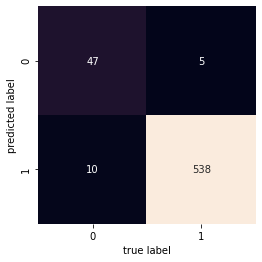

In [8]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(Y_train, y_train_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

A través de la matriu de confusió es pot calcular fàcilment el accuracy, el f1-score, la precisió, el recall... Totes aquestes són mètriques que calculen com de bé o malament ho fa un classificador tenint en compte **un llindar especific** (i.e. 0.5), o en el cas multiclasse també pot ser la classe més probable. Ara bé, si volguessim visualtizar com de bé ho fa cada classificador per **qualsevol valor del llindar**, podem veure el seu comportament a través de analitzar la [curva ROC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) i la [curva Precision-Recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html). Per a utilitzar-lo, necesiteu extreure un score de confiança o unes probabilitats de classificació per a cada una de les categories. Ho podem trobar utilitzant la funció:

* clf.decision_function(X) [per SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.decision_function) i [per LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC.decision_function)

Recordem com es calcula la curva ROC i la Precision-Recall. Per cada valor del llindar, tindrem una matriu de confusió diferent. La ROC mostra el **TPR** vs **FPR** i la PR mostra la relació entre **Precision** vs **Recall**.

True Positive Rate (TPR): del total d'exemples positius, quants hem classificat com a positiu.

$$TPR = Recall = Sensitivity = \frac{TP}{TP + FN}$$

False Positive Rate (FPR): del total d'exemples negatius, quantes falses alarmes positives apareixen.

$$FPR = 1 - Specificity = \frac{FP}{FP + TN}$$

Precision: Quina proporcio de prediccions positives es correcta.

$$Precision = \frac{TP}{TP + FP}$$

<img src="https://miro.medium.com/max/1340/1*urQ3A6h1BNgGM__Uvkwviw.png" width=600>

Si voleu refrescar o aprendre més coses sobre aquestes curves, us recomano aquest [blog](https://towardsdatascience.com/on-roc-and-precision-recall-curves-c23e9b63820c)

Exemple:

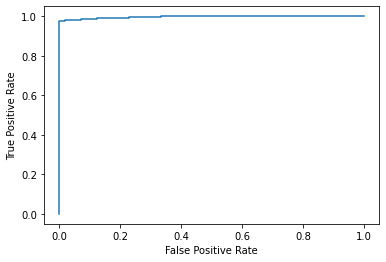

In [9]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay


fpr, tpr, _ = roc_curve(Y_train, y_train_scr, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

### Preguntes

Abans de començar vull dir que jo havia fet tots aquests apartats sobre un cojunt de validation, però llegint l'enunciat de la part C de la pràctica he vist que s'esperava que ho fes sobre el conjunt de training, així que ho he canviat.

#### 1. Mostra les matrius de confusió del apartat A. En tindrem 4: (SVC-binary, LinearSVC-binary, SVC-multiclass, LinearSVC-multiclass) 

Com veiem a continuació, les classificacions son perfectes (les matrius de confusió son matrius diagonals). Això es degut a usar classificadors lineals essent les classes linealment separables, i a imposar $C=\infty$ al usar classificadors no lineals.


La matriu de confusió obtinguda amb el classificador SVC-binary és


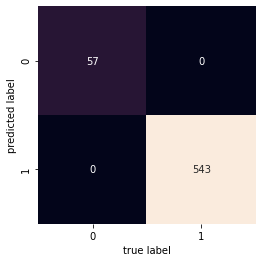

In [10]:
print("La matriu de confusió obtinguda amb el classificador SVC-binary és")
mat = confusion_matrix(Y_train, y_train_pred2)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

La matriu de confusió obtinguda amb el classificador LinearSVC-binary és


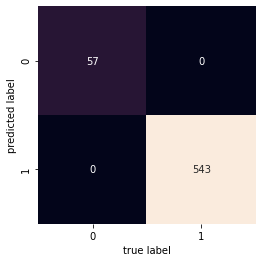

In [11]:
print("La matriu de confusió obtinguda amb el classificador LinearSVC-binary és")
mat = confusion_matrix(Y_train, y_train_pred3)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

La matriu de confusió obtinguda amb el classificador SVC-multiclass és


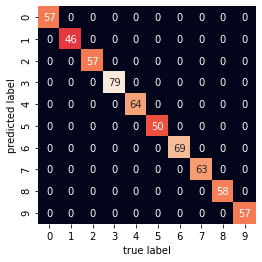

In [12]:
print("La matriu de confusió obtinguda amb el classificador SVC-multiclass és")
mat = confusion_matrix(Y_train_multi, y_train_pred4)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

La matriu de confusió obtinguda amb el classificador LinearSVC-multiclass és


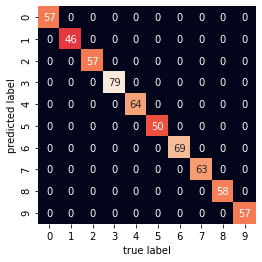

In [13]:
print("La matriu de confusió obtinguda amb el classificador LinearSVC-multiclass és")
mat = confusion_matrix(Y_train_multi, y_train_pred5)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

#### 2. Compara la curva ROC pels casos binaris de SVC i LinearSVC sobre la mateixa gràfica.

Com veiem, en el cas amb LinearSVC no te sentit probar diferents thresholds ja que l'hiperplà separa les dues classes. 

En canvi, en el cas amb SVC i C=1 tenim una mica de marge de joc. Veiem que depenent del threshold poden haver certa cantitat de falsos negatius i/o falsos positius. Això si, la quantitat de falsos negatius que pot haver és mínima.

Observem que totes dues corbes ROC son bones, ja que tenen forma de L invertida respecte la horitzontal.

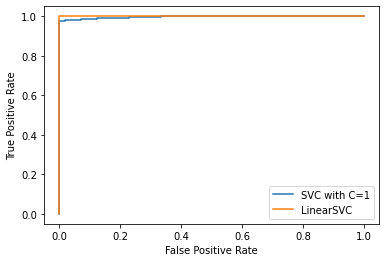

In [14]:
y_train_scr1 = model1.decision_function(X_train)
y_train_scr3 = model3.decision_function(X_train)

# fpr y tpr son los false positive rate y true positive rate ordenados crecientemente. El tercer output retorna els
# thresholds corresponents
ax = plt.gca()
fpr, tpr, _ = roc_curve(Y_train, y_train_scr1, pos_label=model1.classes_[1])
roc_display1 = RocCurveDisplay(fpr=fpr, tpr=tpr).plot(ax=ax, label="SVC with C=1")

fpr, tpr, _ = roc_curve(Y_train, y_train_scr3, pos_label=model3.classes_[1])
roc_display2 = RocCurveDisplay(fpr=fpr, tpr=tpr).plot(ax=ax, label="LinearSVC")

#### 3. Compara la curva PR pels casos binaris de SVC i LinearSVC sobre la mateixa gràfica.

La corba PR per al LinearSVC mostra que la precisió no baixa de 1 per a cap threshold. És a dir, independentment del threshold, no hi ha falsos positius.

En la corba PR del SVC, en canvi, veiem que depenent del threshold podem haver falsos negatius i falsos positius. Tot i que la cuantitat de falsos positius que pot haver és mínima, el numero de True Positives es desplomen amb alguns thresholds. Observem que els resultats son bons ja que la grafica PR del SVC te forma de L invertida respecte la diagonal.

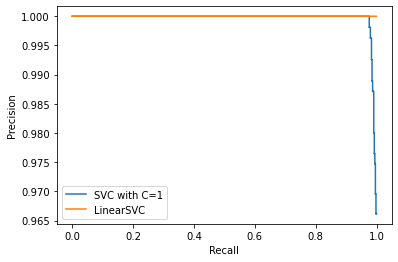

In [15]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

ax = plt.gca()
prec, recall, _ = precision_recall_curve(Y_train, y_train_scr1, pos_label=model1.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot(ax=ax, label="SVC with C=1")

prec, recall, _ = precision_recall_curve(Y_train, y_train_scr3, pos_label=model3.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot(ax=ax, label="LinearSVC")

#### 4. Compara les curves ROC del SVC multicategoria en una mateixa gràfica.

Observem que, tot i que en general totes les ROC tenen forma de L invertida, algunes tenen la forma més exacta que altres, cosa que indica que la classificació d'algunes de les classes aguanta tresholds mes grans que les d'altres.

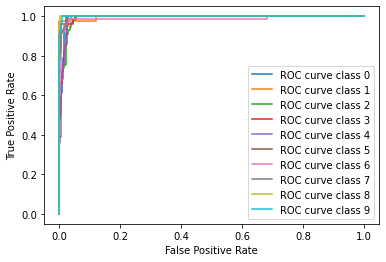

In [16]:
from sklearn.multiclass import OneVsRestClassifier
import copy


model = OneVsRestClassifier(SVC())
y_score_multi = model.fit(X_train_multi, Y_train_multi).decision_function(X_train)

fpr = dict()
tpr = dict()
for i in range(10):
    Y_class = copy.copy(Y_train_multi)
    Y_class[Y_class != i] = -1
    Y_class[Y_class == i] = 1 
    fpr[i], tpr[i], _ = roc_curve(Y_class, y_score_multi[:, i])

ax = plt.gca()
for i in range(10):
    RocCurveDisplay(fpr=fpr[i], tpr=tpr[i]).plot(ax=ax, label='ROC curve class {}'.format(i))

## C. Crossvalidation (30%)

Com debeu haver comprobat, els resultats fins ara son molt alts. I es per què estem analizant el resultat sobre el mateix conjunt de aprenentatge i aquests valors no ens serveixen de gaire quan volguem aplicar el model a dades noves.

Per aquest motiu, el que intentarem de fer en aquest apartat és gestionar les dades que tenim de entrenament per a que poguem llavors trobar els millors hiperparametres que ens permetin aconseguir la millor taxa d'encert en dades mai vistes abans (per aquest motiu, no volem veure com és el test, ja que no volem fer trampes i optimitzar el nostre model sobre la sortida).

Ens basarem amb les eines de [cross-validació](https://scikit-learn.org/stable/modules/cross_validation.html).

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="500px">

Ara bé, tingueu també en compte, que tan important com utilitzar dades mai vistes per optimitzar el classificador, també s'ha de fer el mateix en l'apartat del preprocessat (com per exemple al normalitzar o estandaritzar les dades). No es poden aprendre les transformacions amb dades de "test".

El cas més senzill (menys linies de codi) es fer servir la funció [cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) i [make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)

Ara bé, també vull que entengueu què s'hi fa dins, aixi que farem els dos casos

Exemple:

In [17]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scoring = ['precision_macro', 'recall_macro']
clf = SVC(kernel='linear', C=1, random_state=0)
scores = cross_validate(clf, X_train, Y_train, scoring=scoring, cv=5, return_train_score=True)
print(scores['test_precision_macro'])
scores

[0.87087087 0.87087087 0.9499583  0.80288462 0.90740741]


{'fit_time': array([0.03447938, 0.03511405, 0.03650784, 0.03104687, 0.03429246]),
 'score_time': array([0.01371694, 0.01409769, 0.01378489, 0.0125289 , 0.01376081]),
 'test_precision_macro': array([0.87087087, 0.87087087, 0.9499583 , 0.80288462, 0.90740741]),
 'train_precision_macro': array([1., 1., 1., 1., 1.]),
 'test_recall_macro': array([0.80900751, 0.80900751, 0.9499583 , 0.88888889, 0.90740741]),
 'train_recall_macro': array([1., 1., 1., 1., 1.])}

### Preguntes
#### 1. Utilitza la funció **cross_validate** i **make_pipepline** per trobar quin **accuracy** té el model **SVC()** amb les dades normalitzades amb **StandardScaler**. [(pista)](https://scikit-learn.org/stable/modules/cross_validation.html#the-cross-validate-function-and-multiple-metric-evaluation)

In [18]:
from sklearn import preprocessing


clf = make_pipeline(preprocessing.StandardScaler(), SVC(C=1))
output = cross_validate(clf, X_train_multi, Y_train_multi, scoring="accuracy", cv=5)

print("Les accuracy en cadascún dels 5 folds son:\n", output["test_score"])
print("Observem, per tant, que la accuracy té una mitja de {} i una desviació estàndard de {}".format(output["test_score"].mean(), output["test_score"].std()))

Les accuracy en cadascún dels 5 folds son:
 [0.775      0.75       0.78333333 0.70833333 0.78333333]
Observem, per tant, que la accuracy té una mitja de 0.76 i una desviació estàndard de 0.028577380332470398


#### 2. Analitza el diccionari de camps que t'ha retornat.

El diccionari que retorna la funció cross validate conté els següents camps:
* Un camp "fit_time" que indica el temps emprat en l'entrenament del model usant el fold associat (cada posició del array indica aquest temps per a un dels folds).
* Un camp "score_time" que indica el temps emprat per a obtenir el "scoring" sobre el conjunt de evaluation associat (cada posició del array indica aquest temps per a un dels folds).
* Un camp "test_score" que conté els resultats del "scoring" que hem demanat. En el nostre cas hem demanat la accuracy.

Si es demana mes d'un estimador, en comptes d'un camp "test_score" apareixen un camp per a cada estimador demanat i els seus noms son "test_nomEstimador".

In [19]:
print(output)

{'fit_time': array([0.18433166, 0.18550587, 0.18620849, 0.18849945, 0.18163013]), 'score_time': array([0.03781724, 0.03705192, 0.03689456, 0.0377357 , 0.03425717]), 'test_score': array([0.775     , 0.75      , 0.78333333, 0.70833333, 0.78333333])}


#### 3. Implementa la funció per cross-validar un model i uns parametres en concret. Utilitza la següent funció **entrena_crossvalida** com a base.

In [20]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score


def entrena_crossvalida(model, X, y, k_folds, return_train_score=False): 
    '''
    inputs:
       - model: el objecte que s'entrenarà
       - sample_size: el número de mostres del training set que es farán servir (en %)
       - X: caracteristiques entrenament
       - y: etiqueta entrenament
       - k_folds: número de folds d'entrenament
    '''
    
    results = {"accuracy_val": [], "f1_score_val": [], "elapsed": []}
    
    if return_train_score:
        results["accuracy_train"] = []
        results["f1_score_train"] = []

    """
    Inicialitza el FOLD objecte (i.e. KFold) amb k_folds. Cal fer shuffle a les dades?
    """
    kf = KFold(n_splits=k_folds, shuffle=False)
    
    """
    Itera les dades per cada fold:
    """
    for i, (train_index, val_index) in enumerate(kf.split(X)):
        fold_model = copy.copy(model)
        t_i = time.time()
        print("CROSSVALIDANT FOLD {}".format(i))
        X_train, X_val = X.loc[train_index, :], X.loc[val_index, :]
        y_train, y_val = y[train_index], y[val_index]
 
        """
        Entrena el model amb X_train i y_train:
        """
        fold_model.fit(X_train, y_train)
        
        """
        Obtenir les prediccions del model sobre el conjunt d'entrenament i sobre el conjunt de test
        """
        y_val_pred = fold_model.predict(X_val)
        
        if return_train_score:
            y_train_pred = fold_model.predict(X_train)

        """
        Calcular el accuracy i el F1-score del train i del test
        """
        results["elapsed"].append(time.time() - t_i)
        results["accuracy_val"].append(accuracy_score(y_val, y_val_pred))
        results["f1_score_val"].append(f1_score(y_val, y_val_pred, average='weighted'))
        
        if return_train_score:
            results["accuracy_train"].append(accuracy_score(Y_train, y_train_pred))
            results["f1_score_train"].append(f1_score(y_train, y_train_pred, average='weighted'))

    results["accuracy_val_mean"] = np.mean(results["accuracy_val"])
    results["accuracy_val_std"] = np.std(results["accuracy_val"])
    
    print("El model {} ha té un accuracy promig en {} folds de {} +- {}.".format(model.__class__.__name__, 
                                                                                 k_folds,
                                                                                 results["accuracy_val_mean"],
                                                                                 results["accuracy_val_std"]))
    
    
    return results
 

In [21]:
from sklearn.svm import SVC

model = SVC()

entrena_crossvalida(model, X_train_multi, Y_train_multi, k_folds=5)

CROSSVALIDANT FOLD 0
CROSSVALIDANT FOLD 1
CROSSVALIDANT FOLD 2
CROSSVALIDANT FOLD 3
CROSSVALIDANT FOLD 4
El model SVC ha té un accuracy promig en 5 folds de 0.7633333333333333 +- 0.008498365855987993.


{'accuracy_val': [0.7583333333333333,
  0.7666666666666667,
  0.75,
  0.775,
  0.7666666666666667],
 'f1_score_val': [0.7589074792142195,
  0.7620416388783513,
  0.7466891540938729,
  0.7741837471637028,
  0.7621783463801007],
 'elapsed': [0.18027949333190918,
  0.18186521530151367,
  0.18738317489624023,
  0.18467974662780762,
  0.1799318790435791],
 'accuracy_val_mean': 0.7633333333333333,
 'accuracy_val_std': 0.008498365855987993}

#### 4. Compara els resultats de la pregunta C.3 amb el de la pregunta C.1.

Observem que la accuracy mitja obtenida amb la nostra funció és casi igual (de fet es una mica superior) a la obtenida amb la built-in-function. A més, la variancia obtenida es força inferior (0.0085 vs 0.0286)

Pel que fa als temps d'execució, la nostra funció és una mica mes rápida. En efecte, observem que els temps d'execució per a processar cada "fold" son d'entre 0.04 i 0.05 segons, mentre que els temps d'execució de la funció built-in son de'ntre 0.05 i 0.06 (sorgeixen de sumar el fit_time i el score_time).

## D. Hyperparameter search (20%)

Finalment, crossvalidar un model serveix per tenir una idea bastant aproximada del performance que hauriem d'aconseguir amb un model, unes dades i uns hiperparametres concrets sobre unes dades mai vistes abans. Llavors, si tenim unes dades d'entrenament donades, el que hem d'optimitzar és buscar quin model i quins hiperparametres s'ajusten millor a les nostres necesitats (i.e. més precisió, la millor precisió tenint el compte el cost...).

Per fer això, existeix la búsqueda de hiperparametres. En el cas de SVM, per exemple, podriem optimitzar la C (la força de la regularització), el kernel a utilitzar, els parametres propis de cada kernel (degree  pel 'poly', gamma per ‘rbf’, ‘poly’ i ‘sigmoid’...).

Un exemple de búsqueda de hiperparametres es el [GridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Aqui, es faran les N combinacions segons els parametres i els valors especificats.

Una altra opció és utilitzar una búsqueda Aleatoria del valors, i esperar a trobar la millor solució. D'això se'n diu [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html). En aquest cas, pots definir el **n_iter** que vols que provi. Es a dir, si dius que n_iter=10, farà 10 proves amb diferents valors dels hiperparametres.

Exemple:

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, loguniform
from sklearn.svm import SVC

model = SVC()
distributions = dict(C=uniform(loc=0.001, scale=10),
                     kernel=['poly', 'rbf'],
                     gamma=uniform(loc=0.001, scale=10))
clf = RandomizedSearchCV(model, distributions, random_state=0, n_iter=10)
search = clf.fit(X_train, Y_train)
print("BEST PARAMS: {}".format(search.best_params_))
print("BEST SCORE: {}".format(search.best_score_))

BEST PARAMS: {'C': 6.459941130666562, 'gamma': 4.376872112626925, 'kernel': 'poly'}
BEST SCORE: 0.9433333333333331


### Preguntes
#### 1. Fes una estimació (sense implementar-ho) del número de crosvalidacions que hauries de provar pels diferents parametres i les seves combinacions. Per exemple, considerant només el kernel 'rbf'. Quins hiperparametres poden afectar al resultat final, i quins valors per cada parametre provaries. Conta la seva combinació i multiplicau pel temps que triga a fer una sola crossvalidació.

Els principals hiperparámetres que poden afectar al resultat final son $C$, $\gamma$ (el paràmetre gamma associat al kernel rbf) i $\epsilon$ (la tolèrancia d'aturada de l'entrenament).

Personalment, provaría els següents valors per a cada paràmetre:
* Per a $C$ provaría 0.1, 1, 10, 100, 1000 i $\infty$.
* Per a $\gamma$ provaría 0.1, 1, 10, 100, 1000
* Per a $\epsilon$ provaría $10^{-2}$, $10^{-3}$, $10^{-4}$ i $10^{-5}$

Tenint en compte que això resultaría en un total de $6*5*4=120$ proves, i que cada cross validation triga aproximadament 0.05 segons, el temps total d'execució sería de 6 segons aproximadament.

Per millorar encara mes la cerca, un cop trobada la millor combinació d'hiperparàmetres podríem fer una segona cerca en un entrorn dels valors dels hiperparàmetres trobats, i desprès una tercera cerca, etc...

#### 2. Utilitza **GridSearch** per fer la búsqueda de parametres. Tingues en compte els tipus parametres i les quantitats de valors a provar. Quins hi posaries si no vols que trigui més de 30 minuts.

In [23]:
from sklearn.model_selection import GridSearchCV

t0 = time.time()

parameters = {'kernel':['poly', 'rbf'], 'C':[0.1, 1, 10, 100, 1000],
              'degree':[1, 2, 3], 'gamma':[0.1, 1, 10, 100],
              'tol':[0.001, 0.0001, 0.00005]}
svc = SVC()
clf = GridSearchCV(svc, parameters)

search = clf.fit(X_train_multi, Y_train_multi)

print("Temps d'execució de", time.time()-t0)
print("BEST PARAMS: {}".format(search.best_params_))
print("BEST SCORE: {}".format(search.best_score_))

Temps d'execució de 388.7142245769501
BEST PARAMS: {'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'poly', 'tol': 0.001}
BEST SCORE: 0.775


#### 3. Utilitza **RandomizedSearchCV** per fer búscar els parametres. No permetis que trigui més de 30 minuts. Quins valors ha provat?

In [25]:
t0 = time.time()

model = SVC()

valors = np.arange(0.01, 10000, 0.05)
parameters = {'kernel':['poly', 'rbf'], 'C':valors,
              'degree':[1, 2, 3], 'gamma':valors,
              'tol':[0.001, 0.0001, 0.0005]}

clf = RandomizedSearchCV(model, parameters, random_state=0, n_iter=240)

search = clf.fit(X_train_multi, Y_train_multi)

print("Temps d'execució de", time.time()-t0)

print("BEST PARAMS: {}".format(search.best_params_))
print("BEST SCORE: {}".format(search.best_score_))

Temps d'execució de 251.03852105140686
BEST PARAMS: {'tol': 0.0005, 'kernel': 'poly', 'gamma': 3227.26, 'degree': 1, 'C': 4613.360000000001}
BEST SCORE: 0.775


#### 4. Quin dels dos mètodes ha donat millor resultat, tenint en compte les restriccions de temps de 30 minuts de cerca.

Per a que la tria entre els dos mètodes sigui el mes justa possible he programat de tal manera que les dos cerques facin 240 proves cadascuna. Amb tots dos metodes el millor model ha obtingut una score de 0.775, tot i que la combinació de paràmetres guanyadora es molt diferent amb cada mètode.

#### 5. Ara si, evalua el millor model sobre el conjunt de test **'fashion-mnist_test_small.csv'**.

Observem que l'accuracy obtinguda es molt similar a la obtinguda en l'apartat anterior, cosa que ens diu que el model generalitza bé (tot i que la accuracy de 0.76 no es res de l'altre món).

In [26]:
test_dataset = load_dataset('fashion-mnist_test_small.csv')

model = SVC(C=0.1, kernel='poly', degree=1, gamma=0.1, tol=0.001)
model.fit(X_train_multi, Y_train_multi)

Y_test = test_dataset["label"]
X_test = test_dataset.drop("label", axis="columns")

Y_test_pred = model.predict(X_test)
acc = accuracy_score(Y_test, Y_test_pred)

print("L'accuracy obtinguda és", acc)

L'accuracy obtinguda és 0.76


#### 6. Finalment, amb el millor model que hagis aconseguit sobre 'fashion-mnist_train_small.csv', fes un test sobre 'fashion-mnist_test.csv'. Quin resultat obtens? Son similars als de D.5??

Observem que l'accuracy obtinguda es molt similar a la obtinguda en D.5 (de fet, és una mica millor). Això torna a demostrar la bona capacitat de generalització del model.

In [28]:
test_dataset = load_dataset('fashion-mnist_test.csv')
Y_test = test_dataset["label"]
X_test = test_dataset.drop("label", axis="columns")

Y_test_pred = model.predict(X_test)
acc = accuracy_score(Y_test, Y_test_pred)

print("L'accuracy obtinguda és", acc)

L'accuracy obtinguda és 0.7702


## E. Extra (+10% màxim 10 pts a la practica)

El qui ho vulgui, pot realitzar un entrenament amb les dades completes (i.e. fashion-mnist_train.csv) i fer el test sobre fashion-mnist_test.csv.

Tingueu en compte que l'entrenament pot ser **molt costós** (varies hores sense fer crosvalidació amb el SVC). Us recomano de només fer servir **LinearSVC** (Podeu limitar el numero de max_iter..)

### Preguntes
#### 1. Els millors parametres trobats en els apartats anteriors segueixent funcionant aqui?

Els paràmetres kernel, degree y gamma no funcionen perque estem usant un classificador lineal, però la resta si que funcionen i la accuracy obtinguda supera a l'anterior.

#### 2. Quin resultat has obtingut al tenir moltes més dades d'entrenament? 

Un millor resultat. Hem pasat d'una accuracy de 0.7702 a una accuracy de 0.8039

#### 3. Compareu els vostres resultats amb [l'estat de l'art obtinguts amb sklearn o deep learning](https://github.com/zalandoresearch/fashion-mnist#benchmark)


Els resultats obtinguts estan molt lluny de l'estat de l'art, i especialment dels resultats que es poden obtenir amb xarxes neuronals. En concret, el model WRN-28-10 + Random Erasing obté una accuracy de 0.963.


In [30]:
dataset = load_dataset('fashion-mnist_train.csv')
Y_train = dataset["label"]
X_train = dataset.drop("label", axis="columns")

test_dataset = load_dataset('fashion-mnist_test.csv')
Y_test = test_dataset["label"]
X_test = test_dataset.drop("label", axis="columns")

model = LinearSVC(C=0.1, tol=0.001)
model.fit(X_train, Y_train)

Y_test_pred = model.predict(X_test)
acc = accuracy_score(Y_test, Y_test_pred)

print("L'accuracy obtinguda és", acc)

L'accuracy obtinguda és 0.8039


/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
